
## Use of Machine Learning to Generate and Classify Fractal Shapes

#### Muhannad Alabdullateef
#### Hilderbrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
##### [Twitter](https://twitter.com/mhnd_95) | [GitHub](https://github.com/Mhnd95) | [GoogleScholar](https://scholar.google.com/citations?user=69cHE_wAAAAJ&hl=en&authuser=2) | [LinkedIn](https://www.linkedin.com/in/muhannad-alabdullateef/)

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Lei Liu, Graduate Student, The University of Texas at Austin


### Executive Summary

Fractal shapes are one of the most fascinating things that can be seen with the human eye, but can machines see them? The purpose of this project is to generate, train and classify 2 fractal sets that are randomly generated and pictures from the internet. The CNN in this scenario was built using 3 layers of 2D convolution and pooling, adam optimizer and binary crossentropy as loss function which were chosen after trial and error to produce favorable results. After running the code, recommendations are given on how to expand on the project. 

Data set used for training can be found under: https://github.com/Mhnd95/FractalPrediction


### Import Packages

In [1]:
import os                                                           # To work with create and modify folders
import numpy as np                                                  # To work with data and arrays
import matplotlib.pyplot as plt                                     # To generate the random shapes
import cv2
import tensorflow as tf                                             # To be be able to analyze the generated pictures
from tensorflow.keras.models import Sequential                      # To build the model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy         # To be able to evaluate the model
from tensorflow.keras.models import load_model                                 # To be able to load the model

### Functions

#### The following functions will be used in the workflow.

To define the Mandelbrot Fractal shape:

In [2]:
def mandelbrot_image(width, height, max_iter, x_center=0.0, y_center=0.0, x_width=3.5, y_width=2.0):
    pixel_array = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            zx, zy = x_center + x * (x_width / width) - x_width/2, y_center + y * (y_width / height) - y_width/2
            c = zx + zy * 1j
            z = c
            for i in range(max_iter):
                if abs(z) > 2.0:
                    break 
                z = z * z + c
            pixel_array[y, x] = i
    return pixel_array

* This function would generate the **Mandelbrot set** of fractal shapes and save them as images in the appropriate folder:

In [ ]:
# Ensure the directory exists
# *********** Generates 100 images of the Mandelbrot set, it will take time and local space ***********
output_dir = 'data/mandelbrot_set'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#It takes about 5 minutes to generate 10 images using this code
for i in range(100):
    image = mandelbrot_image(800, 800, 1000, x_center=np.random.uniform(-0.7, 0.7), y_center=np.random.uniform(-0.7, 0.7))
    plt.imsave(os.path.join(output_dir, f'mandelbrot_{i}.png'), image, cmap='twilight_shifted')

To define Julia Fractal shape:

In [3]:
def julia_image(width, height, max_iter, cx, cy):
    pixel_array = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            zx, zy = x * (3.5 / width) - 2.5, y * (2.0 / height) - 1.0
            c = complex(cx, cy)
            z = complex(zx, zy)
            for i in range(max_iter):
                if abs(z) > 2.0:
                    break 
                z = z * z + c
            pixel_array[y, x] = i
    return pixel_array

* This function would generate the **Julia set** of fractal shapes and save them as images in the appropriate folder:

In [ ]:
# Ensure the directory exists
# *********** Generates 100 images of the Julia set, it will take time and local space ***********

output_dir = 'data/julia_set'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#It takes about 5 minutes to generate 10 images using this code
for i in range(100):
    cx, cy = np.random.uniform(-0.8, 0.8), np.random.uniform(-0.8, 0.8)
    image = julia_image(800, 800, 1000, cx, cy)
    plt.imsave(os.path.join(output_dir, f'julia_{i}.png'), image, cmap='twilight_shifted')

### 1. Data Preparation

* Use the previously defined functions to generate i number of fractals (i = 10 was chosen in this case due to relatively long fractal image generation time).

* The generated images should be in **data/[fractal set name]** check with the following code:

In [4]:
os.listdir('data')

['julia_set', 'mandelbrot_set']

* Sample each dataset by running the code below:

Text(0.5, 1.0, 'Julia Set Sample')

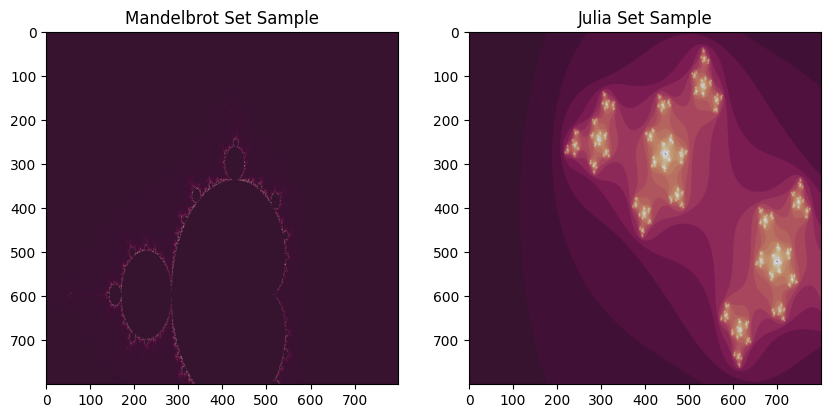

In [5]:
mandelbrot_sample = cv2.imread(os.path.join('data', 'mandelbrot_set', 'mandelbrot_0.png'))
julia_sample = cv2.imread(os.path.join('data', 'julia_set', 'julia_0.png'))
koch_snowflake_sample = cv2.imread(os.path.join('data', 'koch_snowflake_set', 'koch_snowflake_0.png'))

plt.figure(figsize = (10,50))
plt.subplot(1,2,1) 
plt.imshow(mandelbrot_sample)
plt.title('Mandelbrot Set Sample')
plt.subplot(1,2,2)
plt.imshow(julia_sample)
plt.title('Julia Set Sample')



* Sort and insure the images belong to separate classification, for my run:

    0 = Julia Set, 1 =  Mandelbrot Set

* Run the code multiple times to randomly display different fractals:

Found 740 files belonging to 2 classes.


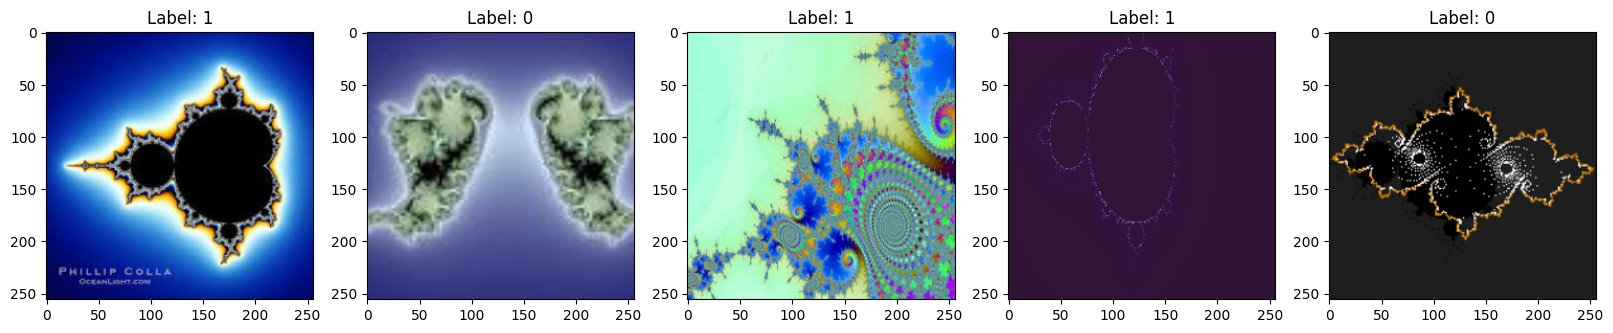

In [7]:
# Reference from YouTube video titles "Build a Deep CNN Image Classifier with ANY Images" by Nicholas Renotte
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = next(data_iterator)                                      # Get the first batch
batch[1]                                                         # Get the labels
fig, ax = plt.subplots(1, 5, figsize=(20, 20))                   # Plot the first 5 images to visually inspect the data
for i in range(5):
    ax[i].imshow(batch[0][i].astype('uint8'))
    ax[i].title.set_text(f'Label: {batch[1][i]}')

### 2. Data Augmentation and Preprocessing

* Scale the data to increase the efficinecy of the run time (only run once to avoid values going to 0):

In [8]:
data = data.map(lambda x, y: (x/255.0, y))                        # Normalize the data

* Check that the scaling is done correctly:

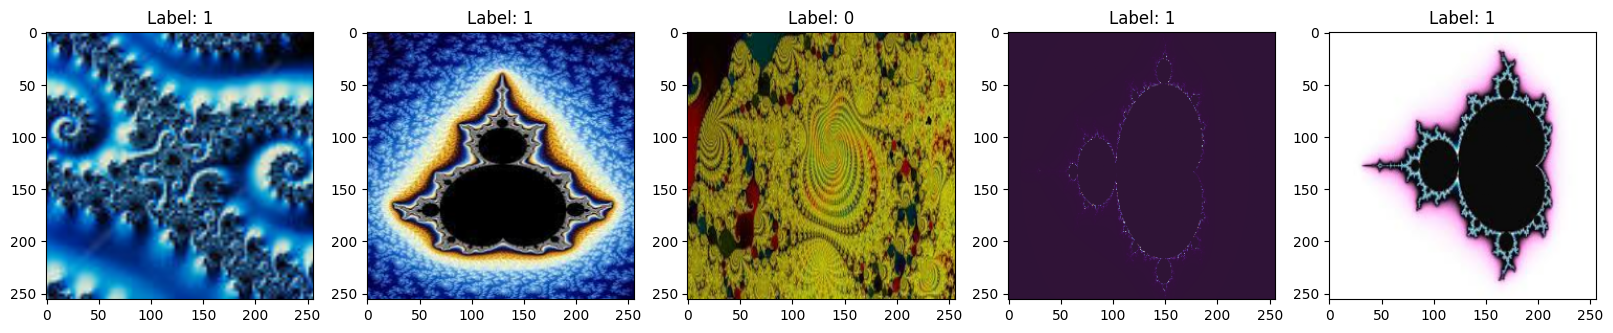

In [9]:
scaled_iterator = data.as_numpy_iterator()                         # Check the first pixel value
batch = scaled_iterator.next()                                     # Get the first batch
fig, ax = plt.subplots(1, 5, figsize=(20, 20))                     # Plot the first 5 images to visually inspect the data
for i in range(5):
    ax[i].imshow(batch[0][i])
    ax[i].title.set_text(f'Label: {batch[1][i]}')

* Split the data:

In [11]:
train_size = int(len(data) * 0.7)                                    # Set the split size between train, validation, and test
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

train = data.take(train_size)                                        # Split the data
val = data.skip(train_size + test_size).take(val_size)
test = data.skip(train_size).take(test_size)


len(train), len(val), len(test),                                     # Check the length of each split

(16, 4, 2)

### 3. Define the CNN model

* Use **'tensorflow.keras'** to define the CNN model:


In [12]:
model = Sequential()                                                  # Initiate the model

* Adding a the nueral network layers:

In [13]:
# Add the first convolutional and pooling layers
model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(256, 256, 3))) 
model.add(MaxPooling2D())                                                      

# Add the second convolutional and pooling layers
model.add(Conv2D(64, (3, 3), 1, activation='relu')) 
model.add(MaxPooling2D())                                                      

# Add the third convolutional and pooling layers
model.add(Conv2D(32, (3, 3), 1, activation='relu')) 
model.add(MaxPooling2D())                                                      

# Flatten the data
model.add(Flatten())                                                           

# Add dense & output layer
model.add(Dense(256, activation='relu'))                                       
model.add(Dense(1, activation='sigmoid'))                                      

### 4. Compile and train the model

* Compile the model then use the generated images to train and test the model:


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy' ,metrics=['accuracy'])
model.summary()                 # Check the model summary              


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        

* Create the necessary log and train the model:

In [15]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
hist = model.fit(train, validation_data=val, epochs=50, callbacks=[tensorboard_callback]) # Train the model

Epoch 1/50


16/16 [==============================] - 6s 331ms/step - loss: 1.0048 - accuracy: 0.4902 - val_loss: 0.6821 - val_accuracy: 0.5391
Epoch 2/50
16/16 [==============================] - 5s 319ms/step - loss: 0.6777 - accuracy: 0.5762 - val_loss: 0.6706 - val_accuracy: 0.5781
Epoch 3/50
16/16 [==============================] - 5s 305ms/step - loss: 0.6381 - accuracy: 0.6562 - val_loss: 0.5990 - val_accuracy: 0.7422
Epoch 4/50
16/16 [==============================] - 5s 298ms/step - loss: 0.6436 - accuracy: 0.6465 - val_loss: 0.6062 - val_accuracy: 0.6797
Epoch 5/50
16/16 [==============================] - 6s 339ms/step - loss: 0.6120 - accuracy: 0.6660 - val_loss: 0.6269 - val_accuracy: 0.6328
Epoch 6/50
16/16 [==============================] - 5s 304ms/step - loss: 0.5891 - accuracy: 0.7051 - val_loss: 0.5976 - val_accuracy: 0.7031
Epoch 7/50
16/16 [==============================] - 5s 305ms/step - loss: 0.5152 - accuracy: 0.7305 - val_loss: 0.5368 - val_accuracy: 0.6953
Epoc

* Plot the accuracy and loss data to visualize the model performance:

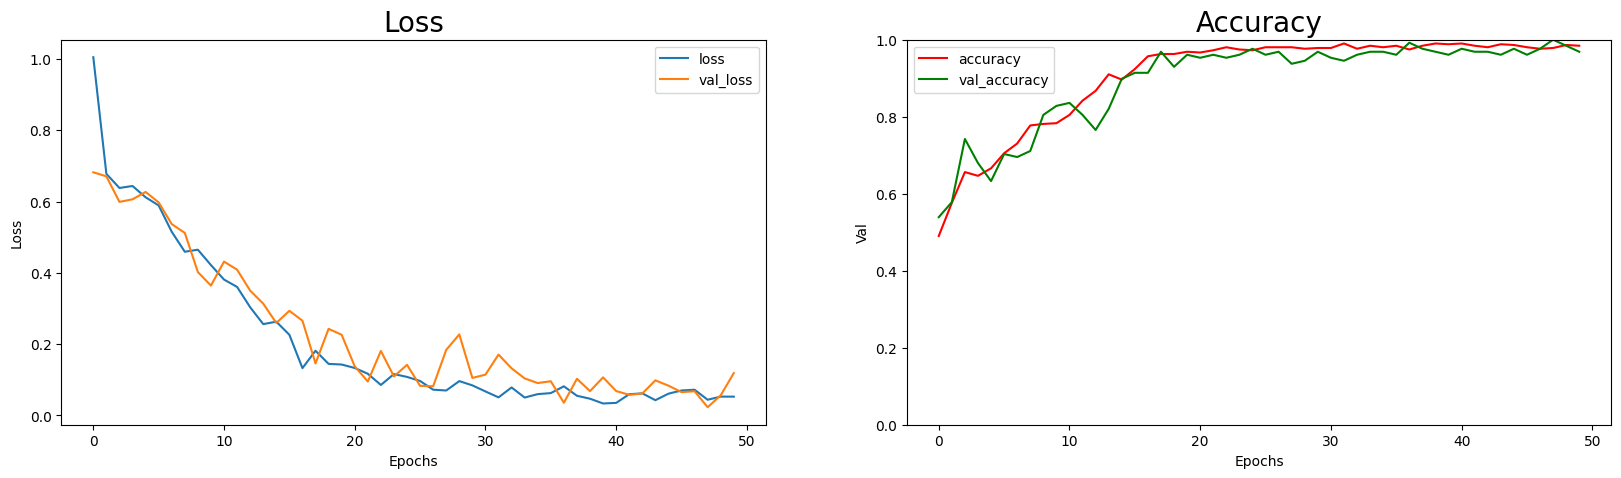

In [16]:
plt.figure(figsize=(20, 5)) # Plot the loss and accuracy
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Loss', fontsize=20)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='accuracy', color='red')
plt.plot(hist.history['val_accuracy'], label='val_accuracy', color='green')
plt.title('Accuracy', fontsize=20)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Val')
plt.ylim(0, 1)
plt.show()

### 5. Evaluate

* Instantiate the precsion, recall and binary accuracy:


In [17]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()  

* Evaluate the accuracy of the model


In [18]:
for batch in test:
    images, labels = batch
    predictions = model.predict(images)
    pre.update_state(labels, predictions)
    re.update_state(labels, predictions)
    acc.update_state(labels, predictions)
    print(f'Precision:        {pre.result().numpy()}')
    print(f'Recall:           {re.result().numpy()}')
    print(f'Accuracy:         {acc.result().numpy()}')

1/1 [==============================] - 0s 136ms/step
Precision:        1.0
Recall:           0.9333333373069763
Accuracy:         0.96875
1/1 [==============================] - 0s 79ms/step
Precision:        1.0
Recall:           0.9411764740943909
Accuracy:         0.96875


* Create the testing set:

In [ ]:
# Ensure the directory exists
output_dir = 'test/testing_set'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i in range(2):
    image = mandelbrot_image(800, 800, 1000, x_center=np.random.uniform(-0.7, 0.7), y_center=np.random.uniform(-0.7, 0.7))
    plt.imsave(os.path.join(output_dir, f'mandelbrot_{i}.png'), image, cmap='twilight_shifted')

for i in range(2):
    cx, cy = np.random.uniform(-0.8, 0.8), np.random.uniform(-0.8, 0.8)
    image = julia_image(800, 800, 1000, cx, cy)
    plt.imsave(os.path.join(output_dir, f'julia_{i}.png'), image, cmap='twilight_shifted')

def save_koch_snowflake(iterations, i, output_dir):
    xs, ys = koch_snowflake(iterations)
    plt.figure(figsize=(8, 8))
    plt.fill(xs, ys, facecolor='cyan', edgecolor='blue')
    plt.axis('equal')
    # Save the figure to the specified directory
    plt.savefig(os.path.join(output_dir, f'koch_snowflake_{i}.png'))
    plt.close()

# Generate and save 10 Koch snowflake images
for i in range(2):
    save_koch_snowflake(4 + i % 3, i, output_dir)

* Grab a known sample from the testing set and visualize it:

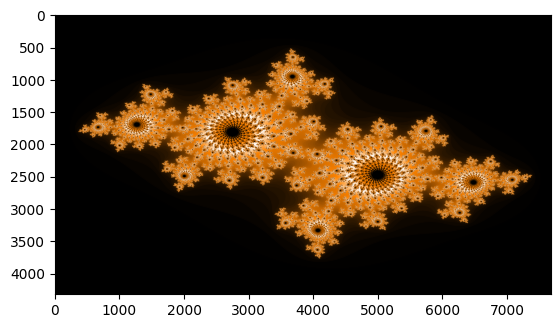

In [34]:
img = cv2.imread(os.path.join('test', 'testing_set', 'test_3.png'))
plt.imshow(img)
plt.show()

* Resize the generated testing set to the the specifications of our model and visualize it:

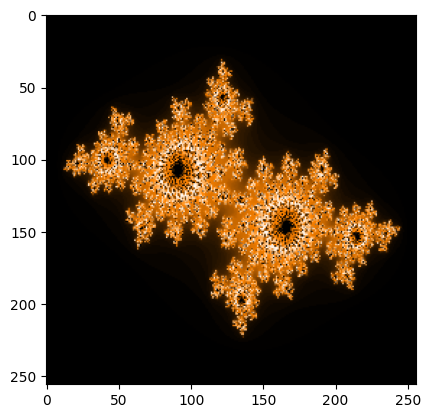

In [35]:
resize = tf.image.resize(img, (256, 256)) 
plt.imshow(resize.numpy().astype('uint8'))
plt.show()

* Run it through the model to generate the prediction:

In [36]:
np.expand_dims(resize, 0)
predictions = model.predict(np.expand_dims(resize/255, 0))
predictions

score = tf.nn.softmax(predictions[0])

if predictions < 0.5:
    class_name = 'Julia Set'
else:
    class_name = 'Mandelbrot Set'

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name, 100 * np.max(score))
)

1/1 [==============================] - 0s 21ms/step
This image most likely belongs to Julia Set with a 100.00 percent confidence.


### 6. Saving & Loading The Model

* Save the model as h5 to be able to use it later:

In [37]:
model.save(os.path.join('models','FractalPrediction.h5'))

c:\Users\M0H\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


* To load a previously made model, use the following code:

In [38]:
new_model = load_model(os.path.join('models','FractalPrediction.h5'))

* Test the loaded model:

In [41]:
test_img = os.path.join('test', 'testing_set', 'test_3.png')
img = cv2.imread(test_img)
resize = tf.image.resize(img, (256, 256)) 

np.expand_dims(resize, 0)
predictions = new_model.predict(np.expand_dims(resize/255, 0))
predictions

score = tf.nn.softmax(predictions[0])

if predictions < 0.5:
    class_name = 'Julia Set'
else:
    class_name = 'Mandelbrot Set'

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name, 100 * np.max(score))
)

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to Julia Set with a 100.00 percent confidence.




### Results

#### Model Summary:

After running the model, the following message was generated evaluating the accuracy of the model:

    1/1 [==============================] - 0s 136ms/step

    Precision:        1.0

    Recall:           0.9333333373069763

    Accuracy:         0.96875


Running the model through the data set gives a prediction between Julia and Mandelbrot with high confidence. 

* Based on those results, the model seem to be as accurate as the training set variety with 50% chance of correctness if something new comes to the model. The following are further areas of exploration on how to improve:
1. Use of a more robust image processing neural network function.
2. Generation of higher number of training set 100s, 1,000s or maybe 1,000,000s images might be required for such simple code.
3. Building a more easily recognizable shape (Triangle vs Circle) and gradually increase the complexity of shapes.
4. Limitation imposed by 256x256 images where some shapes require higher dimensions to capture their true shape.
5. Fractals are randomly generated which could cause some completely black or white images making it more challenging to learn from such data set. 
6. By the nature of Mandelbrot fractals, sometimes it containts Julia shapes which might cause some confusion for a binary system. 

### Comments

* First time trying machine learning, almost all of the project was possible thanks to Dr. Pyrcz's class.
* GitHub copilot was utilized throughout the project which might result in similarites with other existing GitHub codes.
* Building the CNN model was done by following TensorFlow Core 'Image Classification' tutorial and YouTube Tutorial titled: 'Build a Deep CNN Image Classifier with ANY Images' by Nicholas Renotte